# **LINK TO DATA STUDIO PRESENTATION**
[AirBnB Tokyo](https://datastudio.google.com/reporting/1c5affa2-e4fd-432b-a7a8-916be6cb4bf4)


The data is sourced from the Inside Airbnb website http://insideairbnb.com/get-the-data.html which hosts publicly available data from the Airbnb site.
The dataset comprises of four main tables:

- Detailed listings data.

- Detailed reviews

- Detail calendar 

- Neighborhood geojson

Our target audience we toward to are: 
- Tourists, guests who want to visit Tokyo, who want to rent Airbnb.

There are 4 main questions we aim to answer through our analysis:
- What's kind of property of Airbnb in Tokyo?
- How does the demand of Airbnb rentals vary through out the year?
- What is the price range of Airbnb rental in Tokyo?
- What are the most popular locations of Airbnb in Tokyo

##### **RUN ON RECONNECT**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geojson
!pip install git+git://github.com/geopandas/geopandas.git
!apt install proj-bin libproj-dev libgeos-dev
!pip install git+git://github.com/ResidentMario/geoplot.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-m_8q_j69
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-m_8q_j69
     |████████████████████████████████| 15.3MB 323kB/s 
     |████████████████████████████████| 6.5MB 40.0MB/s 
  Created wheel for geopandas: filename=geopandas-0.9.0+14.g294ba75-py2.py3-none-any.whl size=995262 sha256=974decded3b3b507a429a065d6a4072e778188a71034c1084bb5300292453f3a
  Stored in directory: /tmp/pip-ephem-wheel-cache-wb1ahybe/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-com

# **CODE SETUP**

In [ ]:
import re
import sqlite3
import gzip
import zipfile
import geojson
import folium
import numpy as np
import random as rd
import pandas as pd
import seaborn as sns
import geopandas as gpd
import geoplot as gplt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from shapely.geometry import shape, Point

In [ ]:
### GLOBALS ###
PATH_TO_PROJECT = '/content/drive/MyDrive/AirBnB_Tokyo/'
PATH_TO_DATASET = PATH_TO_PROJECT + 'datasets/'

#############################################
############ PATHS TO DATA FILES ############
# CSV Files
summary_listings_path       = PATH_TO_DATASET + 'summary_listings.csv'
summary_reviews_path        = PATH_TO_DATASET + 'summary_reviews.csv'
neighborhoods_path          = PATH_TO_DATASET + 'neighborhoods.csv'

# Gzip Files
detailed_listings_path      = PATH_TO_DATASET + 'detailed_listings.csv.gz'
detailed_reviews_path       = PATH_TO_DATASET + 'detailed_reviews.csv.gz'
detailed_calendar_path      = PATH_TO_DATASET + 'detailed_calendar.csv.gz'
listings_2019_path          = PATH_TO_DATASET + 'listings_2019_mar.csv.gz'
listings_2020_path          = PATH_TO_DATASET + 'listings_2019.csv.gz'
calendar_2019_path          = PATH_TO_DATASET + 'calendar_2019_mar.csv.gz'
calendar_2020_path          = PATH_TO_DATASET + 'calendar_2019.csv.gz'


# GeoJSON Files
neighborhoods_geojson_path  = PATH_TO_DATASET + 'neighborhoods.geojson'

# Zip files
foursquare_tokyo_path       = PATH_TO_DATASET + 'tokyo_checkins.csv.zip'
#############################################
#############################################

In [ ]:
def read_file(path):
    filename = path[path.rfind('/')+1:]
    if path.endswith('.csv') or zipfile.is_zipfile(path):
        df = pd.read_csv(path)

    elif path.endswith('.gz'):
        with gzip.open(path,'rb') as f:
            df = pd.read_csv(f)

    elif path.endswith('.geojson'):
        df = gpd.read_file(path)
    else:
        df = open(path, encoding='utf8')

    print(f'Successfully read {filename}. Returning a {type(df)}.')
    return df

In [ ]:
# CSV Files
df_neighborhoods_csv       = read_file(neighborhoods_path)             # neighborhoods.csv

# Gzip Files
df_reviews                 = read_file(detailed_reviews_path)          # detailed_reviews.csv.gz
df_listings_2021           = read_file(detailed_listings_path)         # detailed_listings.csv.gz
df_calendar_2021           = read_file(detailed_calendar_path)         # detailed_calendar.csv.gz
df_listings_2019           = read_file(listings_2019_path)             # listing_2019_mar.csv.gz
df_listings_2020           = read_file(listings_2020_path)             # listing_2019.csv.gz
df_calendar_2019           = read_file(calendar_2019_path)             # calendar_2019_mar.csv.gz
df_calendar_2020           = read_file(calendar_2020_path)             # calendar_2019.csv.gz

# Zip files
df_checkins_tokyo          = read_file(foursquare_tokyo_path)          # tokyo_checkins.csv.zip

# GeoJSON Files
df_neighborhoods           = read_file(neighborhoods_geojson_path)     # neighborhoods.geojson

Successfully read neighborhoods.csv. Returning a <class 'pandas.core.frame.DataFrame'>.
Successfully read detailed_reviews.csv.gz. Returning a <class 'pandas.core.frame.DataFrame'>.
Successfully read detailed_listings.csv.gz. Returning a <class 'pandas.core.frame.DataFrame'>.
Successfully read detailed_calendar.csv.gz. Returning a <class 'pandas.core.frame.DataFrame'>.


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning:

Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.



Successfully read listings_2019_mar.csv.gz. Returning a <class 'pandas.core.frame.DataFrame'>.
Successfully read listings_2019.csv.gz. Returning a <class 'pandas.core.frame.DataFrame'>.
Successfully read calendar_2019_mar.csv.gz. Returning a <class 'pandas.core.frame.DataFrame'>.
Successfully read calendar_2019.csv.gz. Returning a <class 'pandas.core.frame.DataFrame'>.
Successfully read tokyo_checkins.csv.zip. Returning a <class 'pandas.core.frame.DataFrame'>.
Successfully read neighborhoods.geojson. Returning a <class 'geopandas.geodataframe.GeoDataFrame'>.


#**DATA CLEANING**

###Drop columns

In [ ]:
DROP_COLUMNS = ['listing_url',
                'scrape_id',
                'last_scraped',
                'name',
                'description',
                'neighborhood_overview',
                'host_url',
                'host_name',
                'host_since',
                'host_location',
                'host_about',
                'host_response_time',
                'host_acceptance_rate',
                'host_thumbnail_url',
                'host_picture_url',
                'host_neighbourhood',
                'host_listings_count',
                'host_total_listings_count',
                'host_verifications',
                'host_has_profile_pic',
                'host_identity_verified',
                'neighbourhood',
                'neighbourhood_group',
                'neighbourhood_group_cleansed',
                'property_type',
                'bedrooms',
                'minimum_nights',
                'maximum_nights',
                'minimum_minimum_nights',
                'maximum_minimum_nights',
                'minimum_maximum_nights',
                'maximum_maximum_nights',
                'minimum_nights_avg_ntm',
                'maximum_nights_avg_ntm',
                'availability_30',
                'availability_60',
                'availability_90',
                'availability_365',
                'calendar_updated',
                'has_availability',
                'calendar_last_scraped',
                'number_of_reviews_ltm',
                'number_of_reviews_130d',
                'first_review',
                'last_review',
                'license',
                'instant_bookable',
                'calculated_host_listings_count',
                'calculated_host_listings_count_entire_homes',
                'calculated_host_listings_count_private_rooms',
                'calculated_host_listings_count_shared_rooms']

def drop_columns(input_df, inplace_flag=False):
    if not isinstance(input_df, pd.DataFrame):
        print('INPUT ERROR: The input variable is not a pandas DataFrame.')

    print(f'Inplace = {inplace_flag}.', end=' ')
    
    try:
        deleted_cols = list(set(input_df.columns) & set(DROP_COLUMNS))
        input_df.drop(columns=deleted_cols, inplace=inplace_flag)
        print(f'Dropped {len(deleted_cols)} columns.')
    except Exception as err:
        print('ERROR WHEN ATTEMPTING TO DROP COLUMNS:', err)

In [ ]:
drop_inplace = True
drop_list = [df_reviews,
             df_checkins_tokyo,
             df_listings_2019,
             df_listings_2020,
             df_listings_2021,
             df_calendar_2019,
             df_calendar_2020,
             df_calendar_2021]

for drop_df in drop_list:
    drop_columns(drop_df, inplace_flag=drop_inplace)

df_calendar_2021.drop(columns='price',inplace=drop_inplace) # Drop price since we will use adjusted_price instead
df_neighborhoods.drop(columns='neighbourhood_group', inplace=drop_inplace) # Drop manually, since a column we need to keep is in drop list

Inplace = True. Dropped 0 columns.
Inplace = True. Dropped 0 columns.
Inplace = True. Dropped 49 columns.
Inplace = True. Dropped 49 columns.
Inplace = True. Dropped 49 columns.
Inplace = True. Dropped 2 columns.
Inplace = True. Dropped 2 columns.
Inplace = True. Dropped 2 columns.


###Taking care of nulls

In [ ]:
df_listings_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11308 entries, 0 to 11307
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           11308 non-null  int64  
 1   picture_url                  11308 non-null  object 
 2   host_id                      11308 non-null  int64  
 3   host_response_rate           9543 non-null   object 
 4   host_is_superhost            11290 non-null  object 
 5   neighbourhood_cleansed       11308 non-null  object 
 6   latitude                     11308 non-null  float64
 7   longitude                    11308 non-null  float64
 8   room_type                    11308 non-null  object 
 9   accommodates                 11308 non-null  int64  
 10  bathrooms                    0 non-null      float64
 11  bathrooms_text               11299 non-null  object 
 12  beds                         11238 non-null  float64
 13  amenities       

In [ ]:
# Calculations for filling nulls in column 'beds'
df_listings_2021['bedsPP'] = df_listings_2021['beds']/df_listings_2021['accommodates']
# Takes mean of beds-per-person for each room type
beds_fill = (df_listings_2021.groupby('room_type')['bedsPP'].transform(lambda x: x.fillna(x.mean())) * df_listings_2021['accommodates']).round(0)

# Calculating number of baths from bathrooms_text
baths_fill = df_listings_2021['bathrooms_text'].str.lower().str.replace('half','0.5').str.extract(r'(\d?(?:\d.)?\d)')[0].astype(float)


# Null-filling values for necessary columns
null_fill = {'host_response_rate' : '100%',
             'host_is_superhost' : 'f',
             'beds' : beds_fill,
             'bathrooms' : baths_fill,
             'review_scores_rating' : 0,
             'review_scores_accuracy' : 0,
             'review_scores_cleanliness' : 0,
             'review_scores_checkin' : 0,
             'review_scores_communication' : 0,
             'review_scores_location' : 0,
             'review_scores_value' : 0,
             'reviews_per_month' : 0}

In [ ]:
df_listings_2021.fillna(value=null_fill, inplace=True) # ~10% of rows are nulls, so we fill them
df_reviews.dropna(inplace=True) # Only has ~220 rows of nulls
df_calendar_2021.dropna(inplace=True) # Very few rows have nulls
df_listings_2021.drop(columns='bedsPP', inplace=True) # Drop this buffer column BEFORE dropping rows with nulls
df_listings_2021.dropna(inplace=True) # Drop 9 rows where bathrooms are null, since we assume they have no baths

###Checking the column data types/values

In [ ]:
df_listings_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11299 entries, 0 to 11307
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           11299 non-null  int64  
 1   picture_url                  11299 non-null  object 
 2   host_id                      11299 non-null  int64  
 3   host_response_rate           11299 non-null  object 
 4   host_is_superhost            11299 non-null  object 
 5   neighbourhood_cleansed       11299 non-null  object 
 6   latitude                     11299 non-null  float64
 7   longitude                    11299 non-null  float64
 8   room_type                    11299 non-null  object 
 9   accommodates                 11299 non-null  int64  
 10  bathrooms                    11299 non-null  float64
 11  bathrooms_text               11299 non-null  object 
 12  beds                         11299 non-null  float64
 13  amenities       

#### Modifications
- `beds`, `response_rate` should be `int`
- `price` should be `float`
- `amenities` need to be analyzed
- `bathrooms_text` need to be split to a new `boolean` column `shared_bath`
- change the scale of `review_scores_*` to out-of-5

In [ ]:
df_listings_2021['amenities'].str.strip('["').str.strip('"]').str.replace('"', '').str.get_dummies(sep=', ').sum().sort_values(ascending=False).head(20)

Air conditioning           11166
Hair dryer                 11127
Essentials                 11037
Shampoo                    10948
Long term stays allowed    10805
Wifi                       10543
Smoke alarm                10529
Hangers                     9619
Washer                      9464
Fire extinguisher           9390
Kitchen                     9242
Heating                     9231
Hot water                   8946
Refrigerator                8424
Dedicated workspace         8366
TV                          8125
Microwave                   7896
Dishes and silverware       7400
Iron                        6974
Carbon monoxide alarm       6954
dtype: int64

In [ ]:
df_listings_2021['beds'] = df_listings_2021['beds'].astype('int')
df_listings_2021['host_response_rate'] = df_listings_2021['host_response_rate'].str.replace('%','').astype('int')
df_listings_2021['price'] = df_listings_2021['price'].str.replace(r'[$,]', '').astype('float')
df_listings_2021['shared_bath'] = df_listings_2021['bathrooms_text'].str.lower().str.contains('shared')

need_amenities = ['Air conditioning','Hair dryer','Essentials','Shampoo','Long term stays allowed','Wifi','Smoke alarm','Refrigerator','Heating','Hot water']
# Converting review scores to scale of 5
df_listings_2021['review_scores_rating'] = df_listings_2021['review_scores_rating']/100*5
for score_type in ['accuracy','cleanliness','checkin','communication','location','value']:
    df_listings_2021[f'review_scores_{score_type}'] = df_listings_2021[f'review_scores_{score_type}']/10 * 5


In [ ]:
# Now, we drop the column 'bathrooms_text' since we have extracted all info we can into 'bathrooms' and 'shared_bath'
df_listings_2021.drop(columns='bathrooms_text', inplace=True)

In [ ]:
# Last, rename some long columns for easier use
df_listings_2021.rename(columns={'neighbourhood_cleansed':'nbh',
                                 'bathrooms':'baths'}, inplace=True)

In [ ]:
# We will only analyze neighborhoods with 'Ku' at the end since they have ~98% 
# of the listings and are concentrated around the metro area
df_listings_2021 = df_listings_2021[df_listings_2021['nbh'].str.endswith('Ku')]

In [ ]:
df_listings_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11063 entries, 0 to 11307
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           11063 non-null  int64  
 1   picture_url                  11063 non-null  object 
 2   host_id                      11063 non-null  int64  
 3   host_response_rate           11063 non-null  int64  
 4   host_is_superhost            11063 non-null  object 
 5   nbh                          11063 non-null  object 
 6   latitude                     11063 non-null  float64
 7   longitude                    11063 non-null  float64
 8   room_type                    11063 non-null  object 
 9   accommodates                 11063 non-null  int64  
 10  baths                        11063 non-null  float64
 11  beds                         11063 non-null  int64  
 12  amenities                    11063 non-null  object 
 13  price           

In [ ]:
df_listings_2021['ppp'] = df_listings_2021['price']/df_listings_2021['accommodates']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
q1 = df_listings_2021.groupby(['accommodates', 'room_type'])['ppp'].transform(lambda x: x.quantile(0.25))
q3 = df_listings_2021.groupby(['accommodates', 'room_type'])['ppp'].transform(lambda x: x.quantile(0.75))

uw = 2.5*q3 - 1.5*q1
lw = 2.5*q1 - 1.5*q3

In [ ]:
df_clean_ppp = df_listings_2021[(df_listings_2021['ppp'] <= uw) &
                                (df_listings_2021['ppp'] >= lw)]

### Exporting to csv files

In [ ]:
df_listings_2021.to_csv(PATH_TO_PROJECT+'/datasets/all_listings.csv')

In [ ]:
df_clean_ppp.to_csv(PATH_TO_PROJECT + '/datasets/ppp_cleaned_outliers.csv')

In [ ]:
temp = df_clean_ppp.groupby(['accommodates','room_type']).agg(mean_ppp=('ppp','mean')).reset_index() 
#temp.to_csv(PATH_TO_DATASET + 'ppp_mean_by_accom_roomtype.csv')
temp

,accommodates,room_type,mean_ppp
0,1,Entire home/apt,4201.514286
1,1,Hotel room,2947.107143
2,1,Private room,3124.333333
3,1,Shared room,2641.730627
4,2,Entire home/apt,2624.636935
5,2,Hotel room,2869.567568
6,2,Private room,3092.175963
7,2,Shared room,2277.119565
8,3,Entire home/apt,2033.377871
9,3,Hotel room,2529.622642


# **EDA**

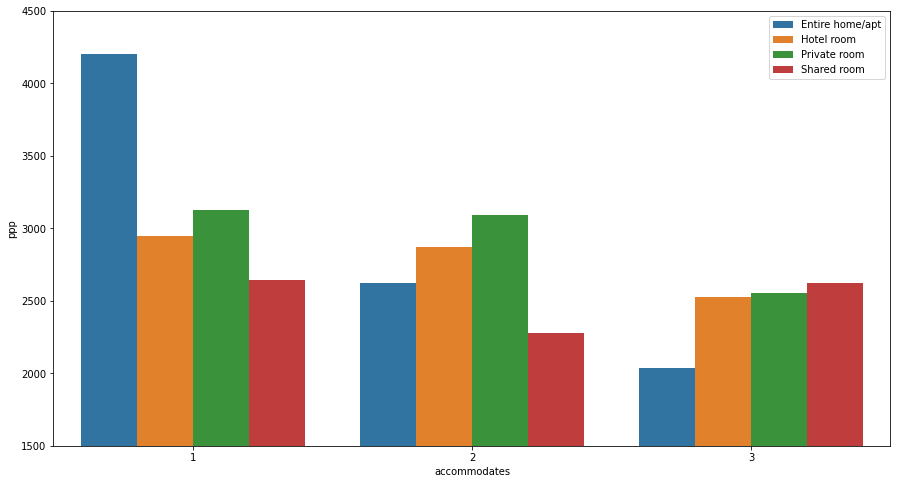

In [ ]:
plot_data = df_listings_2021[(df_listings_2021['ppp'] <= uw) &
                             (df_listings_2021['ppp'] >= lw)]

plt.figure(figsize=(15,8))
sns.barplot(data=plot_data.groupby(['accommodates','room_type']).mean()[['ppp']].reset_index(),
            x='accommodates',
            y='ppp',
            hue='room_type')
plt.xlim(-0.5,2.5)
plt.ylim(1500,4500)
plt.legend(loc='upper right')

In [ ]:
df_listings_2021['room_type'].value_counts()

Entire home/apt    7882
Private room       2325
Hotel room          436
Shared room         420
Name: room_type, dtype: int64

#### Cheapest three locations for Traveling Alone (TA)

In [ ]:
df_loc_singles = df_clean_ppp[(df_clean_ppp['room_type'].isin(['Hotel room','Shared room'])) &
                              (df_clean_ppp['review_scores_rating']>0)].groupby('nbh').agg(mean_ppp=('ppp','mean'),
                                                                                            mean_rating=('review_scores_rating','mean'),
                                                                                            total_listings=('id','count')).sort_values('mean_ppp').reset_index()
df_loc_singles.to_csv(PATH_TO_DATASET + 'locations_single.csv')

In [ ]:
df_listings_2021[df_listings_2021['room_type']=='Entire home/apt'].groupby('nbh')[['ppp']].mean().sort_values('ppp').head(3).reset_index().to_csv(PATH_TO_DATASET + 'locations_pair.csv')

In [ ]:
df_listings_2021[df_listings_2021['room_type']=='Entire home/apt'].groupby('nbh')[['ppp']].mean().sort_values('ppp').head(3).reset_index().to_csv(PATH_TO_DATASET + 'locations_group3.csv')

In [ ]:
11063 + 228

11291

In [ ]:
df_listings_2021[df_listings_2021['nbh'].str.endswith('Ku')]['id'].count()

11063

In [ ]:
df_loc_single = df_clean_ppp[(df_clean_ppp['accommodates']==1) & 
                            (df_clean_ppp['room_type']!='Entire home/apt') & 
                            (df_clean_ppp['review_scores_rating']>0)].groupby('nbh').agg(mean_ppp=('ppp','mean'),
                                                                                        mean_rating=('review_scores_rating','mean'),
                                                                                        total_listings=('id','count')).sort_values('mean_ppp').reset_index()
df_loc_single

,nbh,mean_ppp,mean_rating,total_listings
0,Adachi Ku,1358.333333,4.462500,12
1,Arakawa Ku,1409.666667,4.666667,3
2,Katsushika Ku,1503.954545,4.436364,22
3,Sumida Ku,1657.700000,4.796667,60
4,Koto Ku,2011.250000,4.575000,4
5,Nerima Ku,2100.000000,4.188889,9
6,Shinjuku Ku,2541.025000,4.222500,40
7,Edogawa Ku,2811.600000,4.710000,5
8,Toshima Ku,2892.281250,4.321094,64
9,Nakano Ku,2893.000000,4.900000,1


In [ ]:
alone_locations = ['Adachi Ku', 'Arakawa Ku', 'Katsushika Ku', 'Sumida Ku']
df_clean_ppp[(df_clean_ppp['accommodates']==1) & 
                 (df_clean_ppp['room_type']!='Entire home/apt') & 
                 (df_clean_ppp['nbh'].isin(alone_locations)) &
             (df_clean_ppp['number_of_reviews']>10)].sort_values('review_scores_rating', ascending=False)

,id,picture_url,host_id,host_response_rate,host_is_superhost,nbh,latitude,longitude,room_type,accommodates,baths,beds,amenities,price,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,shared_bath,ppp
3676,30597183,https://a0.muscache.com/pictures/c1529da5-47b1...,228133407,100,t,Sumida Ku,35.70702,139.80081,Shared room,1,2.0,1,"[""Bed linens"", ""Keypad"", ""Shampoo"", ""Fire exti...",1186.0,24,0,4.90,5.0,4.5,5.0,5.0,5.0,5.0,0.91,True,1186.0
6433,38332609,https://a0.muscache.com/pictures/daedd28e-969a...,111369542,100,t,Sumida Ku,35.69592,139.79009,Shared room,1,3.0,4,"[""Bed linens"", ""Keypad"", ""Shampoo"", ""Fire exti...",2000.0,14,0,4.90,5.0,5.0,5.0,5.0,5.0,5.0,0.78,True,2000.0
5233,34606912,https://a0.muscache.com/pictures/c8df6d8e-89f2...,258896821,90,t,Sumida Ku,35.70027,139.80617,Shared room,1,1.5,2,"[""Shampoo"", ""Fire extinguisher"", ""Iron"", ""Refr...",1300.0,12,0,4.90,5.0,4.5,5.0,5.0,5.0,5.0,0.60,True,1300.0
3679,30598845,https://a0.muscache.com/pictures/ec210ea9-1940...,228133407,100,t,Sumida Ku,35.70529,139.79974,Shared room,1,2.0,1,"[""Bed linens"", ""Keypad"", ""Shampoo"", ""Fire exti...",1157.0,23,0,4.85,5.0,5.0,5.0,5.0,5.0,5.0,0.87,True,1157.0
3853,31022931,https://a0.muscache.com/pictures/7945a7f6-5b4e...,228133407,100,t,Sumida Ku,35.70490,139.80003,Private room,1,2.0,1,"[""Bed linens"", ""Keypad"", ""Shampoo"", ""Fire exti...",1500.0,22,0,4.85,5.0,5.0,5.0,5.0,5.0,5.0,0.88,True,1500.0
3672,30596441,https://a0.muscache.com/pictures/20679f20-c65f...,228133407,100,t,Sumida Ku,35.70555,139.80009,Shared room,1,2.0,1,"[""Bed linens"", ""Keypad"", ""Shampoo"", ""Fire exti...",1157.0,24,0,4.85,5.0,4.5,5.0,5.0,5.0,5.0,0.90,True,1157.0
1505,21592259,https://a0.muscache.com/pictures/f99b1670-e190...,12720526,100,f,Sumida Ku,35.70351,139.79660,Shared room,1,3.0,1,"[""Bed linens"", ""Shampoo"", ""Fire extinguisher"",...",2500.0,90,0,4.80,5.0,5.0,5.0,5.0,5.0,5.0,2.31,True,2500.0
1503,21590009,https://a0.muscache.com/pictures/5a5b0041-8ce9...,12720526,100,f,Sumida Ku,35.70351,139.79660,Shared room,1,3.0,1,"[""Bed linens"", ""Shampoo"", ""Fire extinguisher"",...",2500.0,96,0,4.80,5.0,5.0,5.0,5.0,4.5,5.0,2.42,True,2500.0
3592,30378429,https://a0.muscache.com/pictures/0f7e8d91-e408...,228133407,100,t,Sumida Ku,35.70563,139.79976,Shared room,1,2.0,1,"[""Keypad"", ""Shampoo"", ""Fire extinguisher"", ""Ir...",1157.0,34,0,4.80,5.0,5.0,5.0,5.0,5.0,5.0,1.29,True,1157.0
6738,38829915,https://a0.muscache.com/pictures/daedd28e-969a...,111369542,100,t,Sumida Ku,35.69619,139.79194,Shared room,1,3.0,4,"[""Bed linens"", ""Keypad"", ""Shampoo"", ""Fire exti...",2000.0,13,0,4.75,5.0,5.0,5.0,5.0,5.0,5.0,0.81,True,2000.0


In [ ]:
romantic_listings = df_reviews[df_reviews['comments'].str.contains('romantic|romance|a couple\.')]['listing_id'].unique()
df_clean_ppp[(df_clean_ppp['id'].isin(romantic_listings)) & 
             (df_clean_ppp['accommodates']==2)].groupby('nbh').agg(mean_ppp=('ppp','mean'),
                                                                   total_listings=('id','count'),
                                                                   mean_rating=('review_scores_rating','mean')).reset_index().sort_values('mean_ppp')

,nbh,mean_ppp,total_listings,mean_rating
1,Bunkyo Ku,1107.000000,1,4.900000
4,Edogawa Ku,1178.500000,1,4.850000
15,Sumida Ku,1731.909091,11,4.740909
0,Arakawa Ku,1976.250000,2,4.950000
10,Setagaya Ku,1978.500000,3,4.850000
2,Chiyoda Ku,2043.000000,1,4.500000
17,Toshima Ku,2408.625000,8,4.625000
3,Chuo Ku,2434.500000,8,4.806250
9,Ota Ku,2543.000000,1,4.850000
6,Koto Ku,2543.666667,3,4.600000


In [ ]:
locations_couples = ['Bunkyo Ku','Edogawa Ku','Sumida Ku','Arakawa Ku','Setagaya Ku']
df_clean_ppp[(df_clean_ppp['id'].isin(romantic_listings)) & 
             (df_clean_ppp['nbh'].isin(locations_couples)) & 
             (df_clean_ppp['number_of_reviews']>30) & 
             (df_clean_ppp['accommodates']==2)].sort_values('review_scores_rating', ascending=False)

,id,picture_url,host_id,host_response_rate,host_is_superhost,nbh,latitude,longitude,room_type,accommodates,baths,beds,amenities,price,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,shared_bath,ppp
2845,28294775,https://a0.muscache.com/pictures/b1a4e7a6-2420...,213271329,100,f,Sumida Ku,35.71347,139.81123,Entire home/apt,2,1.0,1,"[""Bed linens"", ""Shampoo"", ""Fire extinguisher"",...",4750.0,34,0,4.95,5.0,5.0,5.0,5.0,4.5,5.0,1.14,False,2375.0
2926,28494079,https://a0.muscache.com/pictures/ebf34cad-fda6...,215074082,100,t,Sumida Ku,35.70749,139.80291,Private room,2,1.0,1,"[""Bed linens"", ""Body soap"", ""Paid street parki...",1600.0,108,1,4.95,5.0,5.0,5.0,5.0,5.0,5.0,3.65,True,800.0
242,7901621,https://a0.muscache.com/pictures/623e0394-8d64...,17694529,100,t,Arakawa Ku,35.72672,139.78201,Entire home/apt,2,1.0,2,"[""Host greets you"", ""Heating"", ""Long term stay...",2500.0,260,0,4.90,5.0,4.5,5.0,5.0,4.5,5.0,3.96,False,1250.0
1793,23361617,https://a0.muscache.com/pictures/b17f2785-9068...,66680305,100,t,Setagaya Ku,35.66365,139.67252,Entire home/apt,2,1.0,1,"[""Bed linens"", ""Shampoo"", ""Fire extinguisher"",...",3800.0,66,0,4.90,5.0,5.0,5.0,5.0,5.0,4.5,1.84,False,1900.0
5383,34843302,https://a0.muscache.com/pictures/17ec5d51-e196...,39314421,100,f,Bunkyo Ku,35.70462,139.76620,Entire home/apt,2,1.0,1,"[""Bed linens"", ""Shampoo"", ""Fire extinguisher"",...",2214.0,51,2,4.90,5.0,5.0,5.0,5.0,5.0,5.0,2.60,False,1107.0
520,12503485,https://a0.muscache.com/pictures/41c5c59e-cb1a...,41013044,100,t,Sumida Ku,35.71328,139.80963,Entire home/apt,2,1.0,1,"[""Bed linens"", ""Shampoo"", ""Fire extinguisher"",...",3360.0,146,6,4.85,5.0,5.0,5.0,5.0,4.5,5.0,2.48,False,1680.0
524,12574174,https://a0.muscache.com/pictures/15e1547b-13e1...,41013044,100,t,Sumida Ku,35.71402,139.80911,Entire home/apt,2,1.0,2,"[""Bed linens"", ""Shampoo"", ""Fire extinguisher"",...",3360.0,68,1,4.85,5.0,5.0,5.0,5.0,4.5,5.0,1.16,False,1680.0
2910,28414786,https://a0.muscache.com/pictures/63b54214-a1b9...,213271329,100,f,Sumida Ku,35.71531,139.81148,Entire home/apt,2,1.0,1,"[""Shampoo"", ""Fire extinguisher"", ""Iron"", ""Refr...",4750.0,33,0,4.80,5.0,5.0,5.0,5.0,4.5,4.5,1.11,False,2375.0
3028,28899066,https://a0.muscache.com/pictures/be77d05c-0364...,49382056,100,f,Setagaya Ku,35.66995,139.66898,Entire home/apt,2,1.5,1,"[""Bed linens"", ""Shampoo"", ""Refrigerator"", ""TV""...",4071.0,61,0,4.75,4.5,4.5,5.0,5.0,5.0,4.5,2.13,False,2035.5
196,6837981,https://a0.muscache.com/pictures/86492490/cf1a...,33170407,100,t,Sumida Ku,35.71844,139.81103,Entire home/apt,2,1.0,2,"[""Kitchen"", ""Hot water"", ""Essentials"", ""Hair d...",3500.0,42,1,4.65,5.0,5.0,5.0,4.5,4.5,4.5,0.61,False,1750.0


In [ ]:
locations_three = ['Koto Ku','Bunkyo Ku','Adachi Ku','Sumida Ku']
df_clean_ppp[(df_clean_ppp['nbh'].isin(locations_three)) &
             (df_clean_ppp['accommodates']==3) &
             (df_clean_ppp['number_of_reviews']>30) &
             (df_clean_ppp['room_type']=='Entire home/apt')].sort_values('review_scores_rating',ascending=False)

,id,picture_url,host_id,host_response_rate,host_is_superhost,nbh,latitude,longitude,room_type,accommodates,baths,beds,amenities,price,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,shared_bath,ppp
1861,23669412,https://a0.muscache.com/pictures/af777371-ced4...,3372554,100,f,Sumida Ku,35.71457,139.81914,Entire home/apt,3,1.0,0,"[""Bed linens"", ""Body soap"", ""Shampoo"", ""Iron"",...",6000.0,52,0,4.95,5.0,5.0,5.0,5.0,5.0,5.0,1.55,False,2000.000000
442,11259582,https://a0.muscache.com/pictures/miso/Hosting-...,49146494,100,t,Sumida Ku,35.70806,139.81690,Entire home/apt,3,1.0,2,"[""Shampoo"", ""Fire extinguisher"", ""Iron"", ""Refr...",4244.0,141,0,4.90,5.0,4.5,5.0,5.0,5.0,5.0,2.37,False,1414.666667
3892,31091080,https://a0.muscache.com/pictures/55e2def7-f642...,232298663,100,t,Sumida Ku,35.70352,139.81080,Entire home/apt,3,1.5,3,"[""Bed linens"", ""Shampoo"", ""Fire extinguisher"",...",10000.0,36,0,4.90,5.0,5.0,5.0,5.0,5.0,5.0,1.45,False,3333.333333
962,16931578,https://a0.muscache.com/pictures/8a0a53f7-9484...,63012365,100,t,Sumida Ku,35.70125,139.81225,Entire home/apt,3,1.0,1,"[""Bed linens"", ""Shampoo"", ""Fire extinguisher"",...",10000.0,98,2,4.85,5.0,4.5,5.0,5.0,5.0,4.5,2.02,False,3333.333333
5630,35702459,https://a0.muscache.com/pictures/4d8a00c2-84ef...,256571061,100,f,Sumida Ku,35.71189,139.80981,Entire home/apt,3,1.0,1,"[""Bed linens"", ""Keypad"", ""Shampoo"", ""Iron"", ""R...",4163.0,48,2,4.85,5.0,5.0,5.0,5.0,5.0,5.0,2.41,False,1387.666667
2260,25917334,https://a0.muscache.com/pictures/646b3c78-4b2b...,194784323,100,t,Koto Ku,35.68255,139.83529,Entire home/apt,3,1.0,3,"[""Kitchen"", ""Host greets you"", ""Essentials"", ""...",5849.0,41,0,4.85,5.0,5.0,5.0,5.0,4.5,5.0,1.26,False,1949.666667
5438,35070357,https://a0.muscache.com/pictures/c4c57eb9-ed2d...,263837597,100,t,Sumida Ku,35.70931,139.81661,Entire home/apt,3,1.0,2,"[""Bed linens"", ""Shampoo"", ""Fire extinguisher"",...",5014.0,38,0,4.85,5.0,5.0,5.0,5.0,5.0,4.5,2.13,False,1671.333333
9789,43851951,https://a0.muscache.com/pictures/miso/Hosting-...,345181897,100,t,Koto Ku,35.69540,139.82426,Entire home/apt,3,1.0,3,"[""Shampoo"", ""Fire extinguisher"", ""Refrigerator...",2785.0,88,2,4.80,4.5,5.0,4.5,5.0,5.0,5.0,10.78,False,928.333333
2863,28343304,https://a0.muscache.com/pictures/miso/Hosting-...,212729499,90,f,Sumida Ku,35.69923,139.80222,Entire home/apt,3,1.0,1,"[""Shampoo"", ""Fire extinguisher"", ""Iron"", ""Refr...",5520.0,40,0,4.80,5.0,5.0,4.5,5.0,4.5,4.5,1.40,False,1840.000000
3518,30207072,https://a0.muscache.com/pictures/98cf5b8f-f71c...,226783748,100,t,Sumida Ku,35.72023,139.82207,Entire home/apt,3,1.0,2,"[""Kitchen"", ""Hot water"", ""Essentials"", ""Hair d...",3514.0,63,0,4.80,5.0,5.0,5.0,5.0,4.5,4.5,2.34,False,1171.333333


#**PROPERTY TYPE**

- What are the different types of property in Tokyo? 
- Which types of property and room are the most popular?



In [ ]:
# Property type/Room type in Tokyo
# print(df_listings_2021['room_type'].value_counts())
plot_data = df_listings_2021.groupby('room_type').count()[['id']].loc[['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']]
plot_data

,id
room_type,
Entire home/apt,7986
Private room,2452
Shared room,433
Hotel room,437


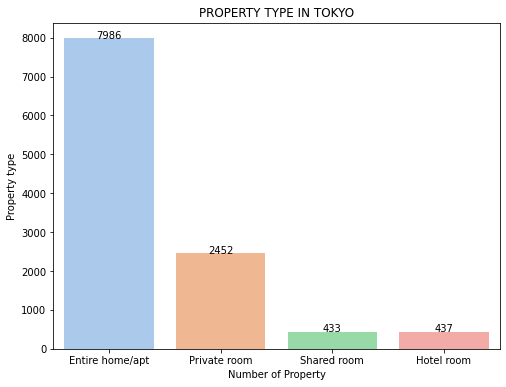

In [ ]:
# CODE HERE
# The most popular type of property
sns.set_palette("pastel")
plt.figure(figsize=(8, 6))
plt.title('PROPERTY TYPE IN TOKYO')
sns.countplot(data = df_listings_2021, 
              x = 'room_type',
              order = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'])
for i in range(plot_data.shape[0]):
    plt.text(i, plot_data.values[i][0]+ 1, plot_data.values[i][0], ha = 'center')
plt.xlabel('Number of Property')
plt.ylabel('Property type')
plt.show()




In [ ]:
# Number of property type by District
df_ku = df_listings_2021.groupby(['nbh','room_type']).count()[['id']].sort_values('id', ascending=False).reset_index()
df_ku['total_listings'] = df_ku.groupby('nbh')['id'].transform('sum')
df_ku.set_index(['nbh','room_type'], inplace=True)

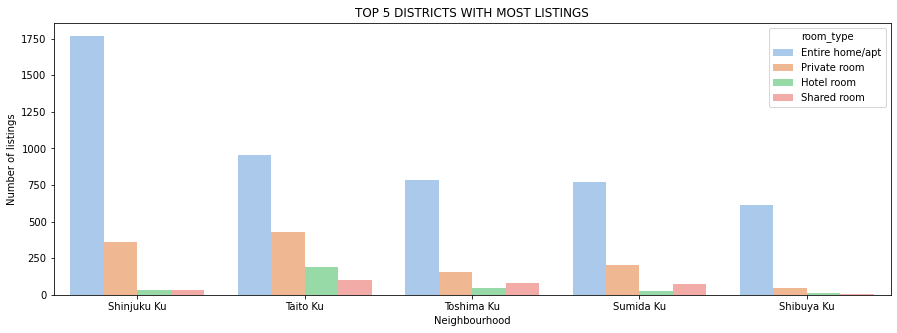

In [ ]:
# Top 5 districts have most listing
plot_data = df_ku.sort_values(['total_listings','id'], ascending=False).head(20).reset_index()
plt.figure(figsize=(15,5))
plt.title('TOP 5 DISTRICTS WITH MOST LISTINGS')
sns.barplot(data = plot_data,
            x = 'nbh',
            y = 'id',
            hue = 'room_type')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of listings')
plt.show()

# **DEMAND**

- How does the demand for Airbnb rentals vary through out the year?

In [ ]:
# Function to check available
def check_av(x):
    if x == 't':
        return 1
    else:
        return 0

In [ ]:
# # Change to datetime type
# df_calendar_2021['available'] = df_calendar_2021['available'].apply(check_av)
# df_calendar_2021['date'] = pd.to_datetime(df_calendar_2021['date'])
# temp = df_calendar_2021.copy()
# temp.set_index('date', inplace=True)

In [ ]:
# Change to datetime type
temp = df_calendar_2021.copy()
temp['available'] = temp['available'].apply(check_av)
temp['date'] = pd.to_datetime(temp['date'])
temp.set_index('date', inplace=True)

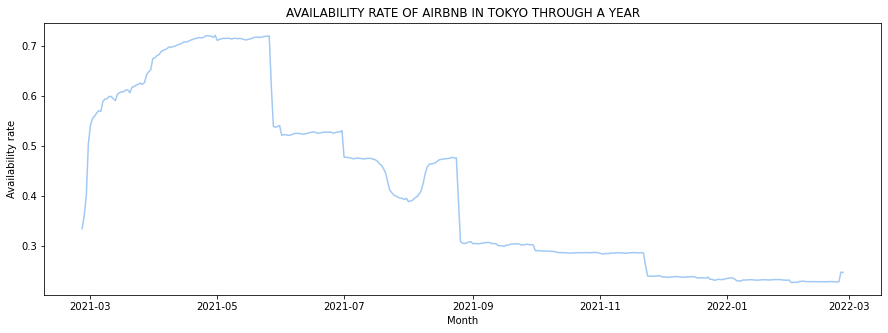

In [ ]:
# Booking rate of Airbnb through out the year
av_bytime = temp.resample('D').mean()['available'].reset_index()
plt.figure(figsize=(15,5))
plt.title('AVAILABILITY RATE OF AIRBNB IN TOKYO THROUGH A YEAR')
sns.lineplot(data=av_bytime,
             x='date',
             y='available')
plt.xlabel('Month')
plt.ylabel('Availability rate')
plt.show()

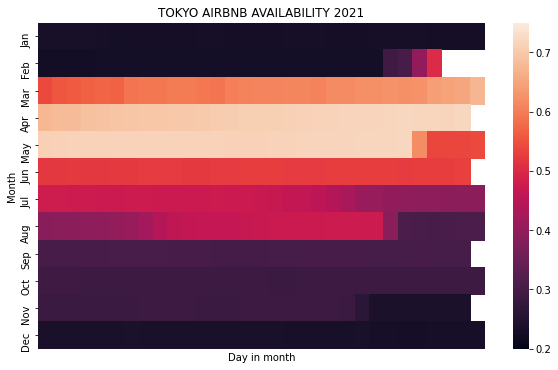

In [ ]:
temp_av_bytime = av_bytime.copy()
temp_av_bytime['month'] = temp_av_bytime['date'].astype('datetime64[D]').astype(str).apply(lambda x: int(x.split('-')[1]))
temp_av_bytime['day'] = temp_av_bytime['date'].astype('datetime64[D]').astype(str).apply(lambda x: int(x.split('-')[2]))
heatmap_data = temp_av_bytime.groupby(['month','day']).mean()['available'].unstack()

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data,
            vmin=0.2,
            vmax=0.75,
            xticklabels=False,
            yticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.xlabel('Day in month')
plt.ylabel('Month')
plt.title('TOKYO AIRBNB AVAILABILITY 2021')
plt.show()



In [ ]:
# Demand of room_type
df_booking = pd.merge(df_calendar_2021, df_listings_2021[['room_type','id']], left_on='listing_id', right_on='id')
df_booking['month_year'] = df_booking['date'].apply(lambda x: x[:-3])
temp = df_booking.copy()
temp['available'] = temp['available'].apply(check_av)
rd_bytime = temp.groupby(['room_type','month_year']).mean()[['available']].reset_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

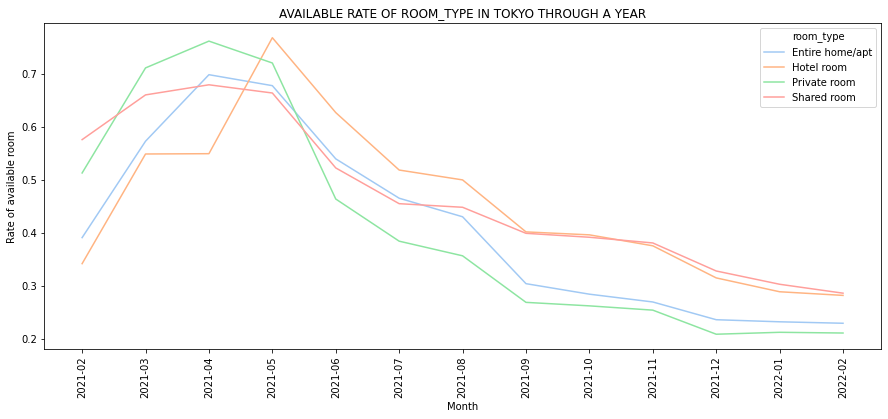

In [ ]:
plt.figure(figsize=(15, 6))
plt.title('AVAILABLE RATE OF ROOM_TYPE IN TOKYO THROUGH A YEAR')
sns.lineplot(data=rd_bytime,
             x = 'month_year',
             y = 'available',
             hue = 'room_type')
plt.xlabel('Month')
plt.ylabel('Rate of available room')
plt.xticks(rotation=90)

In [ ]:
# Check booking
def booking(calendar, listings):
    calendar['available'] = calendar['available'].apply(check_av)
    calendar['date'] = pd.to_datetime(calendar['date'])
    df_booking = pd.merge(calendar, listings[['room_type','id']], left_on='listing_id', right_on='id')
    df_booking['month_year'] = df_booking['date'].apply(lambda x: x.strftime('%Y-%m'))
    temp = df_booking.copy()
    rd_bytime = temp.groupby(['room_type','month_year']).mean()[['available']].reset_index()
    return rd_bytime

In [ ]:
# Check booking of 2019, 2020, 2021
df_booking = booking(df_calendar_2021, df_listings_2021)
df_booking_2019 = booking(df_calendar_2019,df_listings_2019)
df_booking_2020 = booking(df_calendar_2020,df_listings_2020)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

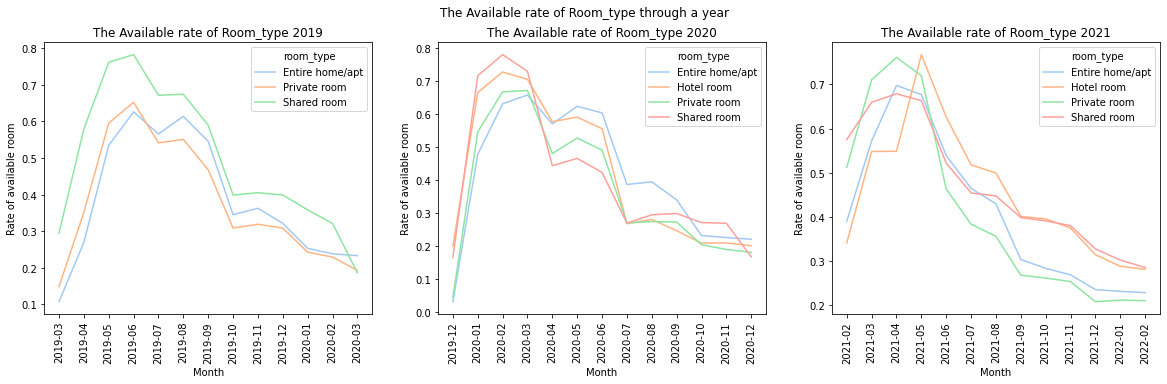

In [ ]:
plt.figure(figsize=(20, 5))
plt.suptitle('The Available rate of Room_type through a year')
# Available rate of 2019
plt.subplot(131)
plt.title('The Available rate of Room_type 2019')
sns.lineplot(data=df_booking_2019,
             x = 'month_year',
             y = 'available',
             hue = 'room_type')
plt.xlabel('Month')
plt.ylabel('Rate of available room')
plt.xticks(rotation=90)

# Available rate of 2020
plt.subplot(132)
plt.title('The Available rate of Room_type 2020')
sns.lineplot(data=df_booking_2020,
             x = 'month_year',
             y = 'available',
             hue = 'room_type')
plt.xlabel('Month')
plt.ylabel('Rate of available room')
plt.xticks(rotation=90)

# Available rate of 2019
plt.subplot(133)
plt.title('The Available rate of Room_type 2021')
sns.lineplot(data=df_booking,
             x = 'month_year',
             y = 'available',
             hue = 'room_type')
plt.xlabel('Month')
plt.ylabel('Rate of available room')
plt.xticks(rotation=90)

#**LOCATION**


- Which location has the most entire home or apartment, private room, shared rooms?
- What are the top 5 most popular locations for airbnb? => what are the rating & review of them by users

- Find the price range for top ten most popular location (boxplot)
- Which neighborhood is the busiet (number checkin)
- Which locations are rated the best by airbnb users? Top 5? 
- Which areas get the worst/best reviews? Why do we think that is?


*(Use host_neighborhood column)*

In [ ]:
neighborhoods_geojson['features']

[{"geometry": {"coordinates": [[[[139.857803, 35.635799], [139.855301, 35.636868], [139.850296, 35.637665], [139.849899, 35.639267], [139.850494, 35.639999], [139.858398, 35.638134], [139.857895, 35.635864], [139.857803, 35.635799]]], [[[139.889999, 35.750801], [139.890396, 35.750401], [139.899796, 35.743732], [139.900101, 35.7356], [139.897095, 35.726665], [139.901398, 35.721466], [139.912109, 35.711266], [139.916107, 35.707733], [139.918701, 35.6978], [139.905899, 35.683731], [139.889099, 35.680599], [139.885803, 35.6768], [139.885895, 35.671131], [139.886597, 35.669868], [139.886993, 35.653866], [139.882095, 35.644001], [139.875504, 35.640533], [139.872894, 35.638535], [139.871796, 35.639332], [139.863495, 35.638401], [139.849701, 35.642666], [139.845215, 35.642979], [139.845215, 35.65062], [139.845505, 35.656666], [139.846497, 35.669868], [139.848206, 35.679066], [139.846207, 35.682064], [139.847397, 35.695465], [139.840195, 35.701065], [139.835205, 35.703133], [139.835999, 35.7070

In [ ]:
map_metro = df_listings_2021[df_listings_2021['nbh'].str.endswith('Ku')]
# Filter out listings that have no score ratings
map_data1 = map_metro[map_metro['review_scores_rating']>0].groupby('nbh').agg(avg_rating=('review_scores_rating','mean'),
                                                                              avg_reviews_per_month=('reviews_per_month','mean')).reset_index()
# Keep all listings for counting and taking the median price
map_data2 = map_metro.groupby('nbh').agg(count_id=('id','count'),
                                         med_price=('price','median')).reset_index()
# Joining those tables to put everything in one table
map_data = map_data2.merge(map_data1,how='left',on='nbh')

map_data['med_price'] = map_data['med_price'].round(2)
map_data['avg_reviews_per_month'] = map_data['avg_reviews_per_month'].round(2)
map_data['avg_rating'] = map_data['avg_rating'].round(2)
map_data

,nbh,count_id,med_price,avg_rating,avg_reviews_per_month
0,Adachi Ku,117,6150.0,4.65,0.93
1,Arakawa Ku,252,7214.0,4.67,1.02
2,Bunkyo Ku,143,6364.0,4.54,1.63
3,Chiyoda Ku,183,10571.0,4.62,0.85
4,Chuo Ku,420,4642.0,4.70,0.96
5,Edogawa Ku,184,7364.0,4.72,0.96
6,Itabashi Ku,174,6228.5,4.67,0.90
7,Katsushika Ku,309,6000.0,4.72,1.05
8,Kita Ku,291,5800.0,4.70,0.94
9,Koto Ku,190,5746.0,4.62,1.50


In [ ]:
# CODE HERE
Map = folium.Map(location=[35.7, 139.5], zoom_start=10, tiles='Stamen Terrain')

for data_column in map_data.columns[1:]:
    folium.Choropleth(
        geo_data=neighborhoods_geojson_path,
        name=data_column,
        data=map_data,
        columns=['nbh', data_column],
        key_on='feature.properties.neighbourhood',
        fill_color='YlOrRd',
        fill_opacity=0.8,
        line_opacity=0.4,
        legend_name=data_column
    ).add_to(Map)

fg = folium.map.FeatureGroup(name='Neighborhoods').add_to(Map)
# for feature in neighborhoods_geojson['features']:
#     b = folium.GeoJson(feature['geometry'])
#     n = feature['properties']['neighbourhood']
#     t = f'<strong>{n}</strong>'
#     for data_column in map_data.columns[1:]:
#         t += f'<br/>{data_column}: '
#         if n in map_data['nbh'].values:
#             tmp = str(map_data[map_data['nbh']==n][data_column].values[0])
#             t += f'<em>{tmp}</em>'
#         else:
#             t += '<em>0</em>'
#     b.add_child(folium.Tooltip(t, sticky=False))
#     fg.add_child(b)


#Map.keep_in_front(fg)
folium.LayerControl().add_to(Map)
Map

In [ ]:
df_neighborhoods_ku = df_neighborhoods[df_neighborhoods['neighbourhood'].str.endswith('Ku')].rename(columns={'neighbourhood':'nbh'})
df_ku = df_neighborhoods_ku.merge(df_loc_singles,on='nbh',how='inner')

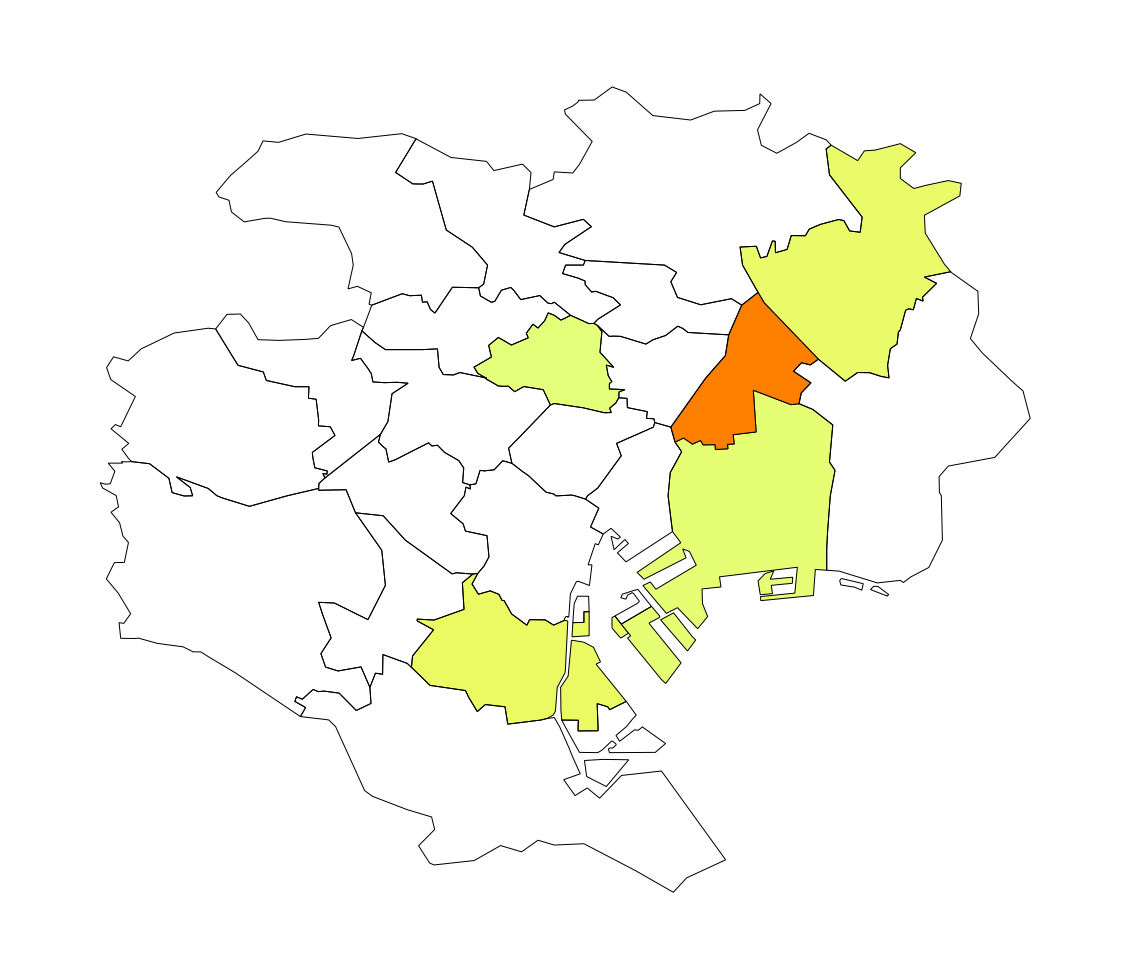

In [ ]:
plot_data = df_ku.sort_values('mean_ppp')
chosen_nbhs = ['Shinagawa Ku','Koto Ku','Katsushika Ku','Sumida Ku','Bunkyo Ku']
plot_data['chosen'] = (plot_data['nbh'].isin(chosen_nbhs).astype(int) * plot_data['total_listings']).replace(0,np.nan)
gplt.choropleth(plot_data,
                hue='chosen',
                cmap='Wistia',
                figsize=(20,20))

# **PRICE**


- Most expensive/cheap listing => show price
    . Which amenities does the host provide? Count amount and maybe find most common
    . Where is the location
    . The name of most  expensive/cheap house (picture url)
    
- What is the top 5 expensive/cheap areas? Range and other statistics Price/night
    
- Price range for different property type


 

*(Look in df_listings_2021)*

In [ ]:
# CODE HERE
# The average price of each property type

df_listings_2021.groupby('room_type').mean()[['price']].round()

,price
room_type,
Entire home/apt,12555.0
Hotel room,11350.0
Private room,11910.0
Shared room,5224.0


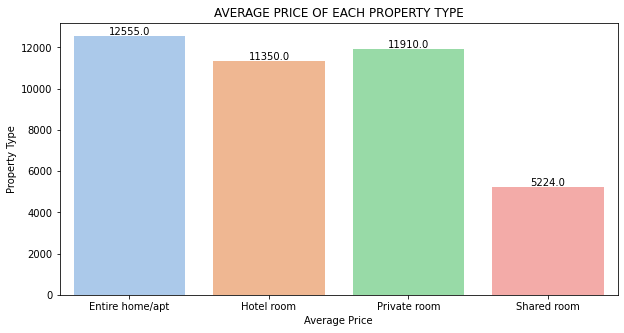

In [ ]:
# Average price of each property_type
plot_data = df_listings_2021.groupby('room_type').mean()['price'].round().loc[['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']].reset_index()
plt.figure(figsize= (10,5))
plt.title('AVERAGE PRICE OF EACH PROPERTY TYPE')
sns.barplot(data=plot_data,
                x="room_type",
                y="price",
                order=['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'])
for i in range(plot_data.shape[0]):
    plt.text(i, plot_data.values[i][1]+50, plot_data.values[i][1], ha = 'center')
plt.xlabel('Average Price')
plt.ylabel('Property Type')
plt.show()

**The DataFrame I will be using to answer all my questions is the df_listings_2021 dataset from Airbnb**

In [ ]:

df = df_listings_2021 


## A Price Distribution Overview of Airbnb's in Tokyo (per night)

**For this question I will be working with the Price column which we cleaned above.**

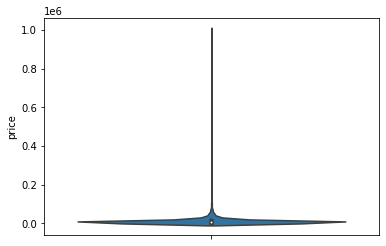

In [ ]:
sns.violinplot(y=df["price"])

In [ ]:
df["price"].describe()

count      11308.000000
mean       12087.621330
std        34894.056148
min            0.000000
25%         4000.000000
50%         6714.000000
75%        12000.000000
max      1000000.000000
Name: price, dtype: float64

**Most of the data is grouped around a similar price point of around 12000 yen as we can see from the Violin plot above. To get a better understanding of this data we remove these outliers. Furthermore, we would like to look at the PRICE PER PERSON in the following questions so to solve for that we create a new column PPP as seen below.**

In [ ]:
df.info()

In [ ]:
df['PPP'] = df["price"]/df["accommodates"]
df["PPP"]

0         2750.000000
1         3714.000000
2         1733.333333
3         5500.000000
4        15000.000000
             ...     
11303     1666.666667
11304     2061.800000
11305     2800.000000
11306     2500.000000
11307     1135.500000
Name: PPP, Length: 11308, dtype: float64

In [ ]:
Q1 = df["PPP"].quantile(0.25)
Q3 = df["PPP"].quantile(0.75)

IQR = Q3 - Q1

UW = Q3 + 1.5*IQR
LW = Q1 - 1.5*IQR

clean_price = df[(df['PPP']  < UW) & (df['PPP']  > LW)]

clean_price

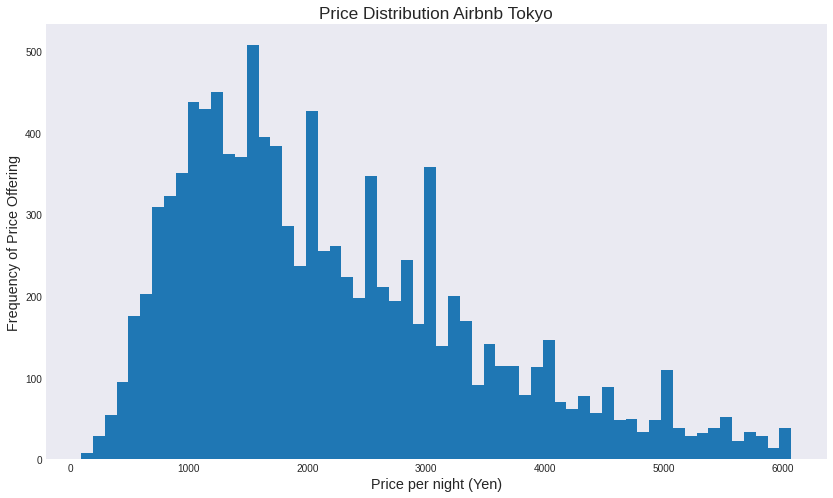

In [ ]:
plt.style.use('seaborn-dark')

plt.figure(figsize=(14, 8))

clean_price["PPP"].plot(kind='hist', bins = 60)

plt.title('Price Distribution Airbnb Tokyo', size = "xx-large")

plt.xlabel("Price per night (Yen)", size = "x-large")

plt.ylabel("Frequency of Price Offering", size = "x-large")

plt.show()




## What are the 5 most Expensive areas per night? What are the 5 cheapest? (per person)

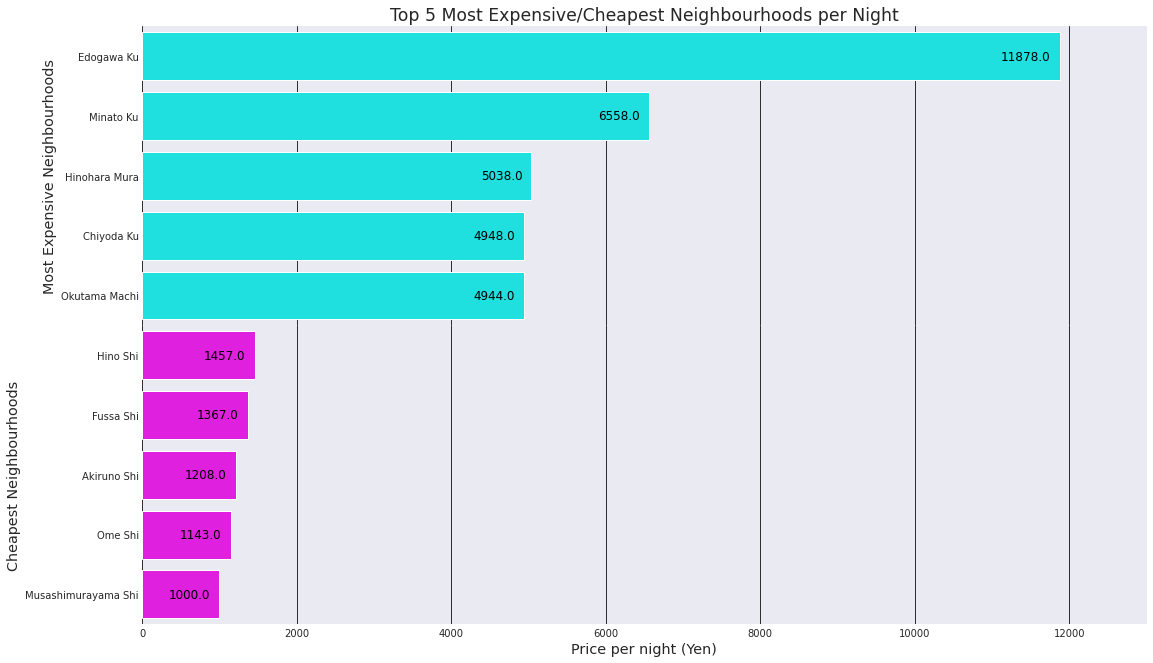

In [ ]:
sns.set_style('darkgrid')

fig, axs = plt.subplots(2,1, sharex=True, figsize=(18,11))
ax1, ax2 = axs
################
################

plot_data = df.groupby('nbh').mean()[['PPP']].sort_values("PPP", ascending=False).head(5).reset_index()

sns.barplot(data=plot_data,
            x='PPP',
            y='nbh',
            color='cyan',
            ax=ax1)

ax1.set_title('Top 5 Most Expensive/Cheapest Neighbourhoods per Night', size = "xx-large")
#ax1.set_xlabel("Price per night (Yen)", size = "x-large")
ax1.set_ylabel("Most Expensive Neighbourhoods", size = "x-large")
ax1.grid(color='black', which='major', axis='x', linestyle='solid')
ax1.get_xaxis().get_label().set_visible(False)

plot_data2 = df.groupby("nbh").mean()[['PPP']].loc[['Edogawa Ku', 'Minato Ku', 'Hinohara Mura', 'Chiyoda Ku', "Okutama Machi"]]
plot_data2 = round(plot_data2)
for i in range(plot_data2.shape[0]):
    ax1.text(plot_data2.values[i][0] - 0.01*plot_data2.values[0][0],i, plot_data2.values[i][0], 
             ha='right', va='center', color='black', fontsize=12, fontweight='medium')


####################


plot_data = df.groupby("nbh").mean()[['PPP']].sort_values("PPP", ascending=False).tail(5).reset_index()

sns.barplot(data=plot_data,
            x='PPP',
            y="nbh",
            color='magenta',
            ax=ax2)

ax2.set_xlabel("Price per night (Yen)", size = "x-large")
ax2.set_ylabel("Cheapest Neighbourhoods", size = "x-large")
ax2.grid(color='black', which='major', axis='x', linestyle='solid')

plot_data1 = df.groupby("nbh").mean()[['PPP']].loc[['Hino Shi', 'Fussa Shi', 'Akiruno Shi', 'Ome Shi', "Musashimurayama Shi"]]
plot_data1 = round(plot_data1)
for i in range(plot_data1.shape[0]):
    ax2.text(plot_data1.values[i][0] - 0.01*plot_data2.values[0][0],i, plot_data1.values[i][0], 
             ha='right', va='center', color='black', fontsize=12, fontweight='medium')

####################
####################

fig.subplots_adjust(hspace=0)
#plt.suptitle('Top 5 Most Expensive/Cheapest Neighbourhoods per Night', size = "xx-large")
plt.xlim([0, 13000])
plt.show()

## A Study of Airbnb Host Services.

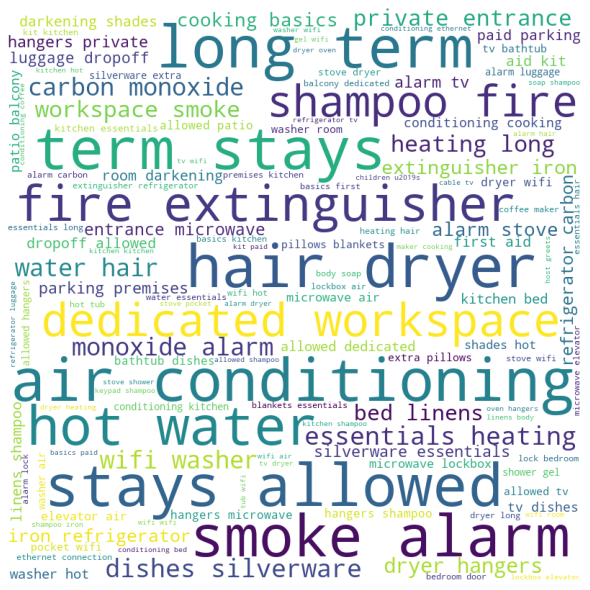

In [ ]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

for val in df["amenities"]:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

# **Ranking Areas by Rating**

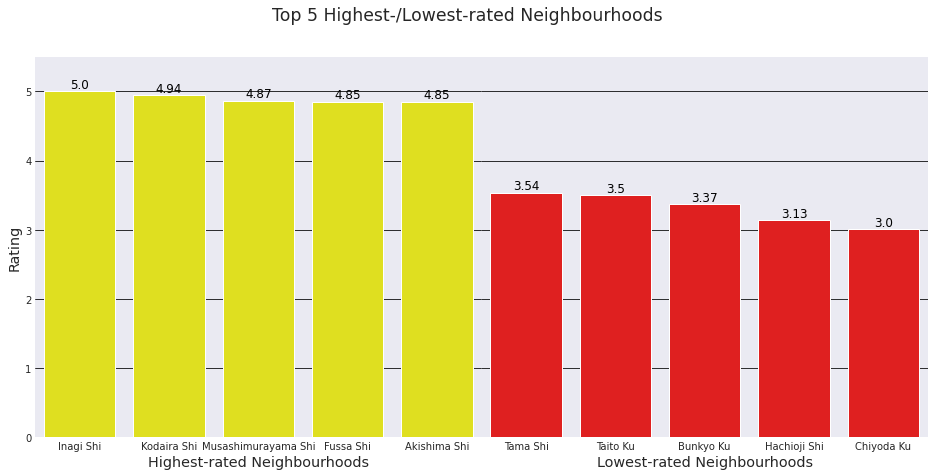

In [ ]:
fig, axs = plt.subplots(1,2, sharey=True, figsize=(16, 7))
ax1, ax2 = axs

#########
#########

plot_review = df.groupby("nbh").mean()[['review_scores_rating']].sort_values("review_scores_rating", ascending=False).head(5).reset_index()

sns.barplot(data=plot_review,
            x='nbh',
            y="review_scores_rating",
            color='yellow',
            ax=ax1)

ax1.set_xlabel("Highest-rated Neighbourhoods", size = "x-large")
ax1.set_ylabel("Rating", size = "x-large")
ax1.set_ylim(0, 5.5)
ax1.grid(color='black', which='major', axis='y', linestyle='solid')

plot_review2 = df.groupby("nbh").mean()[['review_scores_rating']].loc[['Inagi Shi', 'Kodaira Shi', 'Musashimurayama Shi', 'Fussa Shi', "Akishima Shi"]]
plot_review2 = round(plot_review2,2)
for i in range(plot_review2.shape[0]):
    ax1.text(i, plot_review2.values[i][0] + 0.05, plot_review2.values[i][0],
             ha='center', color='black', fontsize=12, fontweight='medium')

##########
##########

plot_review = df.groupby("nbh").mean()[['review_scores_rating']].sort_values("review_scores_rating", ascending=False).tail(5).reset_index()

sns.barplot(data=plot_review,
            x='nbh',
            y="review_scores_rating",
            color='red',
            ax=ax2)

ax2.set_xlabel("Lowest-rated Neighbourhoods", size = "x-large")
ax2.get_yaxis().get_label().set_visible(False)
ax2.grid(color='black', which='major', axis='y', linestyle='solid')

plot_review1 = df.groupby("nbh").mean()[['review_scores_rating']].loc[['Tama Shi', 'Taito Ku', 'Bunkyo Ku', 'Hachioji Shi', "Chiyoda Ku"]]
plot_review1 = round(plot_review1,2)
for i in range(plot_review1.shape[0]):
    ax2.text(i, plot_review1.values[i][0] + 0.05, plot_review1.values[i][0],
             ha='center', color='black', fontsize=12, fontweight='medium')

###########

fig.subplots_adjust(wspace=0)
plt.suptitle('Top 5 Highest-/Lowest-rated Neighbourhoods', size='xx-large')
plt.show()


### This is what 500 000 Yen will get you........

In [ ]:
df["PPP"].max()

500000.0

In [ ]:
most_expensive = df.loc[df["PPP"] == 500000]

most_expensive["picture_url"].values[0]

'https://a0.muscache.com/pictures/62508619-2da2-481d-9dfe-8fdc6d0e7c00.jpg'

### Where as for just 1 135 Yen a night you could stay here!

In [ ]:
cheapest = df.loc[df["PPP"] > 0].tail(1)
cheapest["picture_url"].values[0]

'https://a0.muscache.com/pictures/d9f7a24e-c1f9-4194-9671-0b34003a1eef.jpg'

# Analysis for Exporting to Data Studio

In [ ]:
df["reviews"]